# MATH 210 Assignment 3

### Instructions

* There are 4 problems and 22 total points
* Write your solutions in the cells below
* You may work on these problems with others but you must write your solutions on your own
* Use NumPy, SciPy and Matplotlib
* Execute the test cells to verify that your solutions pass
* This notebook does not contain all tests for grading (this means that your solution may not be completely correct even if it passes all tests below)
* Submit this notebook to Canvas before **11:59pm Friday October 26**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from hashlib import sha1
%matplotlib inline

### Problem 1 (5 points)

Write a function called `sum_sine_plot` which takes input parameters `a`, `b`, `N` and `num` and plots the function 

$$
f(x) = \frac{1}{2} + \sum_{k=1}^{N} \frac{1 - (-1)^k}{k \pi} \sin(k x)
$$

over the interval $[a,b]$ using `num` equally spaced points from `a` to `b`. (In other words, use `np.linspace(a,b,num)` for the `x` values.) The function also returns the `x` and `y` values of the plot in a matrix with 2 columns with `x` values in the first column and `y` values in the second.

In [19]:
def sum_sine_plot(a,b,N,num):
    
    x = np.linspace(a,b,num)    
    terms = [((1-(-1)**k)/(k*np.pi))*np.sin(k*x) for k in range(1,N+1)]    
    y = 0.5 + sum(terms)
    plt.plot(x,y)
    plt.show()
    matrix = np.column_stack((x,y))
    
    return matrix

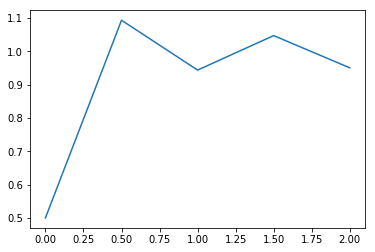

Problem 1 Test 1: Success!


In [20]:
"Check sum_sine_plot returns the correct datatype."
assert type(sum_sine_plot(0,2,5,5)) == type(np.array([0])) , "Return value should be a NumPy array."
print("Problem 1 Test 1: Success!")

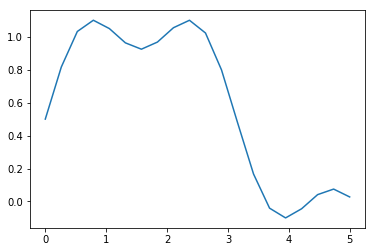

Problem 1 Test 2: Success!


In [21]:
"Check sum_sine_plot returns the correct size of NumPy array."
assert sum_sine_plot(0,5,3,20).shape == (20,2) , "Return value should be matrix with size num by 2."
print("Problem 1 Test 2: Success!")

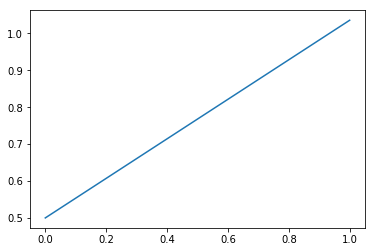

Problem 1 Test 3: Success!


In [22]:
"Check sum_sine_plot returns the correct values."
epsilon = 10e-8
assert np.max(np.abs(sum_sine_plot(0,1,1,2) - np.array([[0.,0.5],[1.,1.03569707]]))) < epsilon
print("Problem 1 Test 3: Success!")

### Problem 2 (5 points)

Write a function called `z_product` which takes input parameters `z` and `N` and returns the product

$$
\frac{N^z}{z} \prod_{k=1}^N \frac{k}{z + k}
$$

Use the function `np.prod` with NumPy arrays.

In [23]:
def z_product(z,N):
    terms = [k/(z+k) for k in range(1,N+1)]
    total = (N**z/z)*np.prod(terms)
    return total

In [24]:
"Check that z_product returns the correct datatype."
assert type(z_product(2,7)) == np.float64 , "Return value should be a NumPy float."
print("Problem 2 Test 1: Success!")

Problem 2 Test 1: Success!


In [25]:
"Check that z_product returns the correct values."
assert z_product(1,1) == 1/2 , "Return value should be 1/2 when z=1 and N=1."
print("Problem 2 Test 2: Success!")

Problem 2 Test 2: Success!


In [26]:
"Check that z_product returns the correct values."
epsilon = 10e-5
assert np.abs(z_product(2,1) - 1/6) < epsilon , "Return value should be 1/6 when z=1 and N=1."
print("Problem 2 Test 3: Success!")

Problem 2 Test 3: Success!


### Problem 3 (5 points)

Write a function called `mid_riemann` which takes input parameters `a`, `b`, `m` and `N` and returns the Riemann sum approximation (with midpoints and `N` subintervals) of the integral
$$
\int_a^b \frac{x^m}{(1+x^2)^2} dx
$$

In [27]:
def mid_riemann(a,b,m,N):
    
    x = np.linspace(a,b,N+1)
    y = x**m/(1+x**2)**2
    dx = (b-a)/N
    
    x_mid = (x[1:] + x[:N])/2
    y_mid = x_mid**m/(1+x_mid**2)**2
    m_riemann = np.sum(y_mid)*dx
    
    return m_riemann

In [28]:
"Check that riemann_left returns the correct type."
assert type(mid_riemann(0,2,1,10)) == np.float64, "Return type should be a NumPy float."
print("Problem 3 Test 1: Success!")

Problem 3 Test 1: Success!


In [29]:
"Check that riemann_left returns the correct values."
assert mid_riemann(0,2,1,1) == 1/2
print("Problem 3 Test 2: Success!")

Problem 3 Test 2: Success!


##  Problem 4 (7 points)

Consider the integral
$$
\int_1^b \frac{e^{-t}}{t} dt
$$

(a) (2 points) Find an upper bound $| f''(x)| \leq K_2$ for $x \in [1,\infty)$ where $f(x)=e^{-x}/x$. Save the value as `K2`.

In [60]:
x = 1
K2 = np.abs((np.e**(-x))*(x**2 + 2*x + 2)/x**3)

In [61]:
assert sha1(str(K2).encode('utf8')).hexdigest() == '042bb56f0af253c4571e3218a4cbbcca22176a75', "That is not the expected value."
print("Problem 4 Test 1: Success!")

AssertionError: That is not the expected value.

(b) (5 points) Write a function called `Ei` which takes input parameters `b` and `max_error` and returns the approximation of the integral

$$
\int_1^b \frac{e^{-t}}{t} dt
$$

given by the trapezoid method with $N$ subintervals which guarantees the error is less than `max_error`.

In [66]:
def Ei(b,max_error):
    
    N = int(np.ceil((((5/np.e)*(b-1)**3)/(max_error*12))**0.5))
    
    if (b-1) == 0:
        
        return 0
    
    x = np.linspace(1,b,N+1)
    y = (np.e**(-x))/x
    dx = (b-1)/N
    
    y_l = y[:N]
    l_riemann = np.sum(y_l)*dx
    
    y_r = y[1:]
    r_riemann = np.sum(y_r)*dx
    
    return (r_riemann + l_riemann)/2

In [67]:
"Check that Ei returns the correct type."
assert type(Ei(2,0.001)) == np.float64
print("Problem 4 Test 2: Success!")

Problem 4 Test 2: Success!


In [68]:
"Check that Ei returns the correct values."
assert Ei(1,0.01) == 0
print("Problem 4 Test 3: Success!")

Problem 4 Test 3: Success!


In [69]:
"Check that Ei returns the correct values."
epsilon = 10e-14
assert abs(Ei(5,0.001) - 0.21833350347126337) < epsilon
print("Problem 4 Test 4: Success!")

Problem 4 Test 4: Success!
